## 载入数据 & 分割数据

In [1]:
from sklearn.datasets import fetch_olivetti_faces # 使用sklearn的内置数据集

In [2]:
fetch_data = fetch_olivetti_faces()  # 面部识别数据集

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/dudushuomingshu/scikit_learn_data


In [5]:
from sklearn.model_selection import train_test_split # 使用sklearn的数据分割模块进行数据分割：训练集&测试集

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    fetch_data.data,
    fetch_data.target,
    train_size = 0.6,  # 指定训练集的占比
    stratify = fetch_data.target  
) # 监督学习分为两种：分类&回归

## 使用LDA进行降维

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # 导入LDA（注意这里是线性判别LDA，不是主题模型LDA）

In [9]:
LDA = LinearDiscriminantAnalysis(n_components=15) # 设定降维到多少， 最大的维数为class-1，此例中class为40（来自数据集的信息）

In [10]:
LDA.fit(X_train,y_train)  # 拟合训练集

LinearDiscriminantAnalysis(n_components=15)

In [11]:
rX_train = LDA.transform(X_train) # 对训练集X_train进行降维操作

In [12]:
rX_train.shape  # 降到了15维

(240, 15)

In [13]:
X_train.shape  # 原来是4096维

(240, 4096)

In [14]:
rX_test = LDA.transform(X_test) # 对测试集X_test进行降维操作

## 训练KNN，使用降维后的数据

In [15]:
from sklearn.neighbors import KNeighborsClassifier # 导入KNN分类器模块（KNN还有用于回归的模块）

In [16]:
kNN = KNeighborsClassifier(n_neighbors=1)  # 创建kNN分类器，指定k=1

In [17]:
kNN.fit(rX_train,y_train)  # 对训练集进行拟合（注意使用的是降维后的rX_train)

KNeighborsClassifier(n_neighbors=1)

## 进行预测

In [20]:
y_pred = kNN.predict(rX_test) 

In [19]:
from sklearn.metrics import accuracy_score   # 导入sklearn的模型评价模块matrics中的acc_score来评价模型效果

In [21]:
accuracy_score(y_true=y_test, y_pred=y_pred)  

0.95

## 不同的维数看效果

In [31]:
acc = []
for num in range(1,40):
    LDA = LinearDiscriminantAnalysis(n_components=num)
    LDA.fit(X_train,y_train)
    rX_train = LDA.transform(X_train)
    rX_test = LDA.transform(X_test)
    
    kNN = KNeighborsClassifier(1)
    kNN.fit(rX_train,y_train)
    y_pred = kNN.predict(rX_test)
    acc.append(accuracy_score(y_true=y_test, y_pred=y_pred))
print(acc)

[0.15625, 0.4125, 0.6125, 0.7, 0.8, 0.84375, 0.90625, 0.925, 0.925, 0.94375, 0.94375, 0.94375, 0.95, 0.9375, 0.9375, 0.95625, 0.95, 0.95625, 0.95625, 0.95625, 0.9625, 0.95625, 0.96875, 0.9625, 0.975, 0.975, 0.975, 0.975, 0.96875, 0.975, 0.975, 0.98125, 0.98125, 0.975, 0.98125, 0.98125, 0.975, 0.96875, 0.96875]


In [32]:
import matplotlib.pyplot as plt

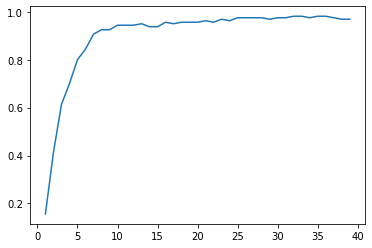

In [33]:
plt.plot(range(1,40),acc)

## kNN 取不同的k值时的准确率

In [43]:
acc1 = []
for num in range(1,40):
    LDA = LinearDiscriminantAnalysis(n_components=15)
    LDA.fit(X_train,y_train)
    rX_train = LDA.transform(X_train)
    rX_test = LDA.transform(X_test)
    
    kNN = KNeighborsClassifier(num)
    kNN.fit(rX_train,y_train)
    y_pred = kNN.predict(rX_test)
    acc1.append(accuracy_score(y_true=y_test, y_pred=y_pred))
print(acc1)

[0.9375, 0.925, 0.9375, 0.925, 0.93125, 0.93125, 0.93125, 0.91875, 0.9125, 0.9, 0.8875, 0.88125, 0.84375, 0.825, 0.8, 0.78125, 0.7625, 0.75, 0.7375, 0.70625, 0.69375, 0.675, 0.6375, 0.6125, 0.59375, 0.55, 0.53125, 0.51875, 0.48125, 0.43125, 0.4, 0.36875, 0.35625, 0.35, 0.325, 0.3125, 0.29375, 0.275, 0.275]


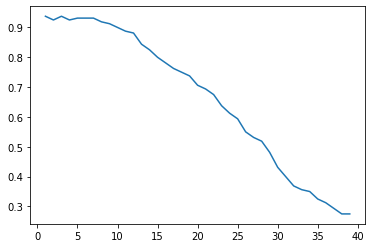

In [44]:
plt.plot(range(1,40), acc1)

## 不同的维数和不同的kNN的K取值的组合

In [38]:
acc2 = []
for num1 in range(1,40):
    LDA = LinearDiscriminantAnalysis(n_components=num1)
    LDA.fit(X_train,y_train)
    rX_train = LDA.transform(X_train)
    rX_test = LDA.transform(X_test)
    for num2 in range(1, 40):
        kNN = KNeighborsClassifier(num2)
        kNN.fit(rX_train,y_train)
        y_pred = kNN.predict(rX_test)
        acc2.append([num1, num2, accuracy_score(y_true=y_test, y_pred=y_pred)])
print(acc2)

[[1, 1, 0.15625], [1, 2, 0.15625], [1, 3, 0.15], [1, 4, 0.175], [1, 5, 0.1875], [1, 6, 0.175], [1, 7, 0.16875], [1, 8, 0.20625], [1, 9, 0.1875], [1, 10, 0.21875], [1, 11, 0.2125], [1, 12, 0.19375], [1, 13, 0.1875], [1, 14, 0.175], [1, 15, 0.16875], [1, 16, 0.15], [1, 17, 0.15625], [1, 18, 0.14375], [1, 19, 0.14375], [1, 20, 0.1375], [1, 21, 0.1375], [1, 22, 0.15], [1, 23, 0.14375], [1, 24, 0.13125], [1, 25, 0.1375], [1, 26, 0.15], [1, 27, 0.15], [1, 28, 0.15], [1, 29, 0.15], [1, 30, 0.14375], [1, 31, 0.1375], [1, 32, 0.125], [1, 33, 0.11875], [1, 34, 0.125], [1, 35, 0.11875], [1, 36, 0.1125], [1, 37, 0.1125], [1, 38, 0.1125], [1, 39, 0.1125], [2, 1, 0.4125], [2, 2, 0.3875], [2, 3, 0.425], [2, 4, 0.4625], [2, 5, 0.425], [2, 6, 0.4125], [2, 7, 0.44375], [2, 8, 0.44375], [2, 9, 0.4125], [2, 10, 0.425], [2, 11, 0.43125], [2, 12, 0.41875], [2, 13, 0.4], [2, 14, 0.4], [2, 15, 0.36875], [2, 16, 0.3875], [2, 17, 0.34375], [2, 18, 0.325], [2, 19, 0.33125], [2, 20, 0.35], [2, 21, 0.3625], [2, 22

In [45]:
import numpy as np
import pandas as pd

In [73]:
df = pd.DataFrame(np.array(acc2),
                 columns=['dim', 'k', 'acc'])

<ipython-input-74-0ff1f9879fd6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6.5,6.5))


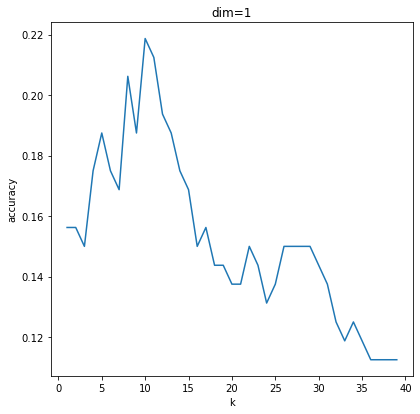

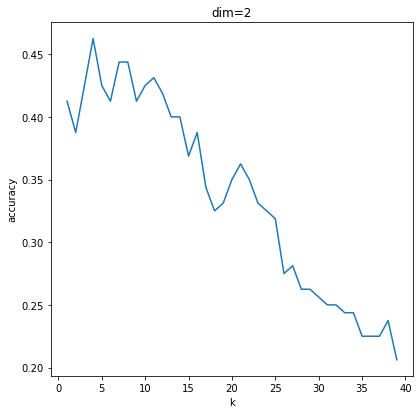

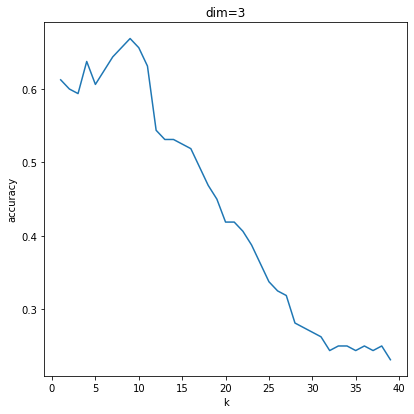

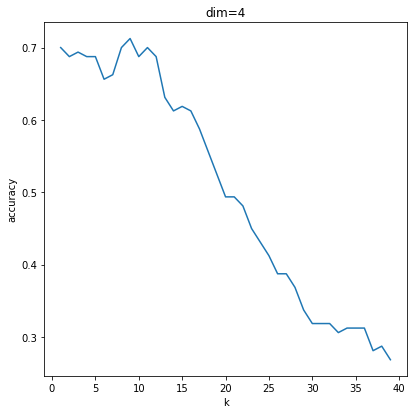

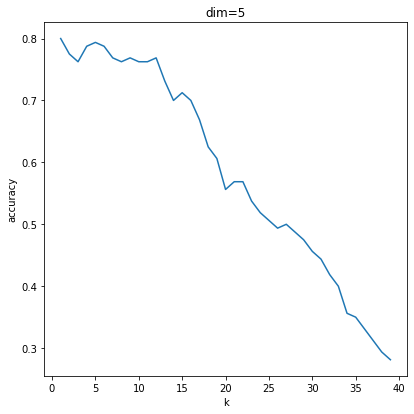

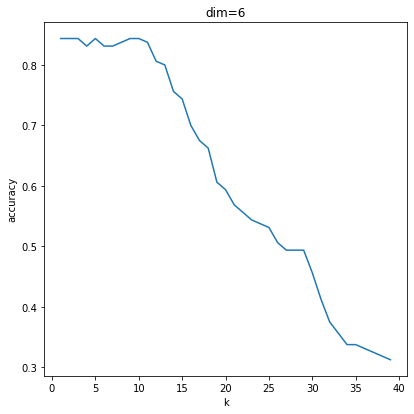

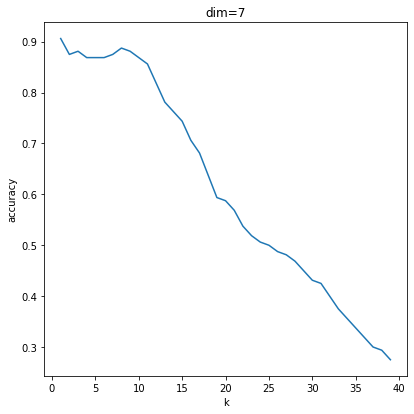

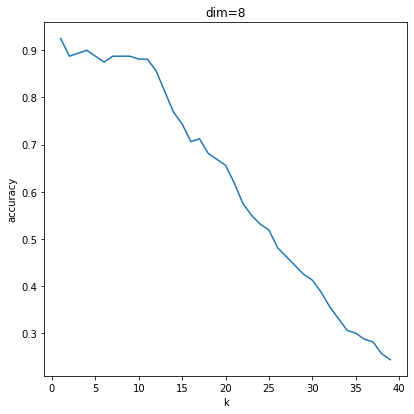

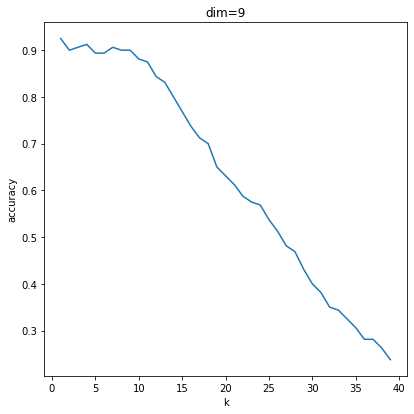

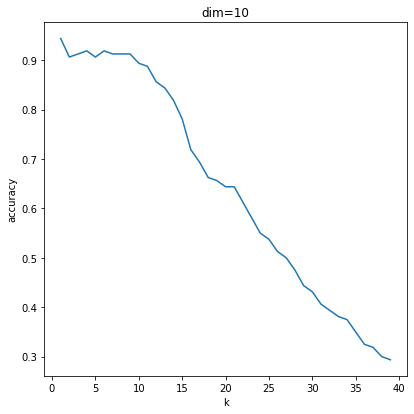

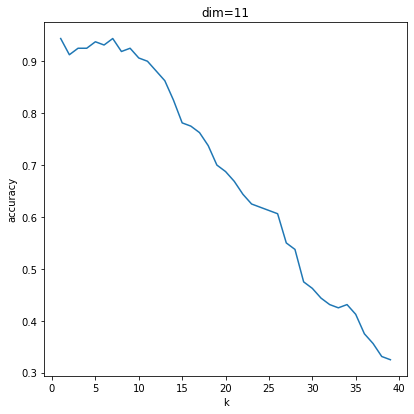

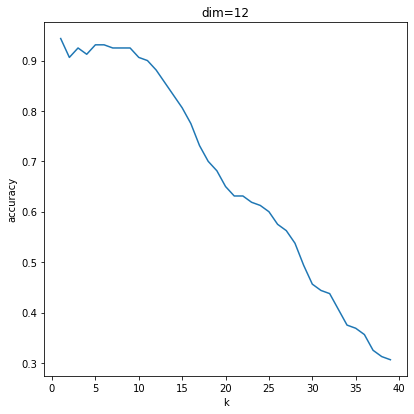

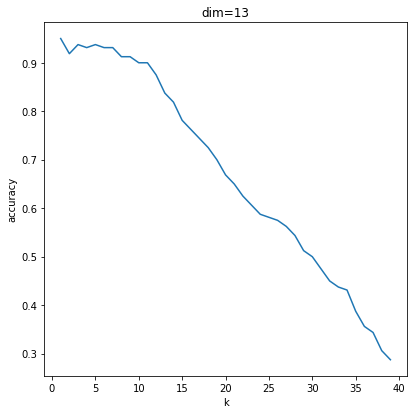

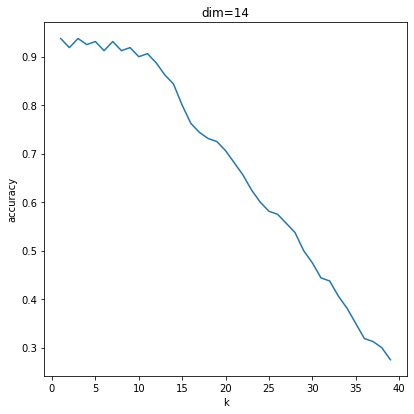

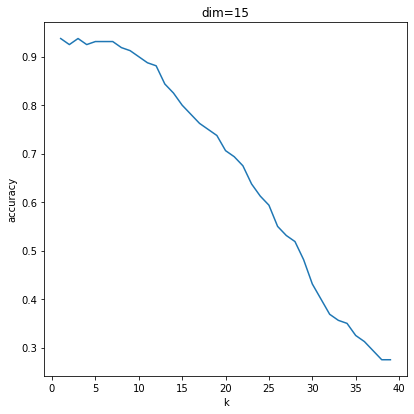

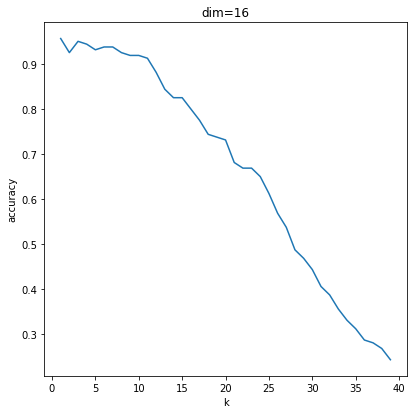

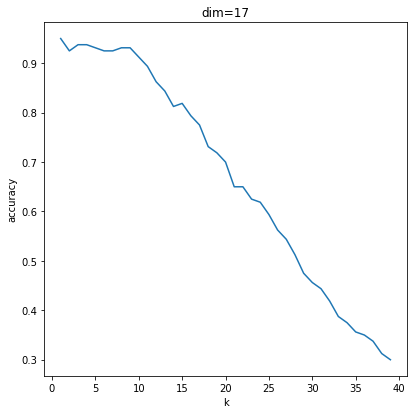

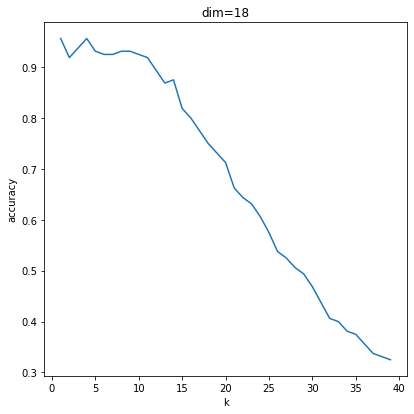

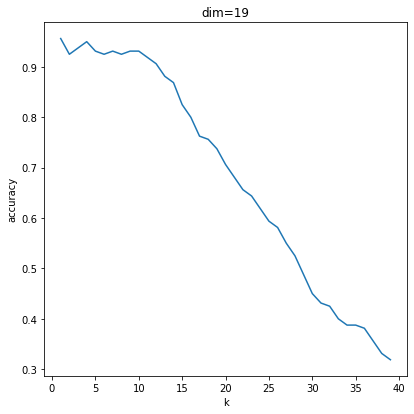

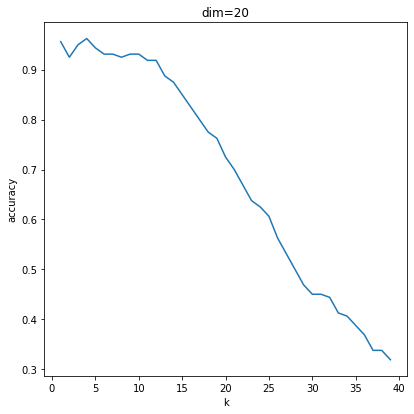

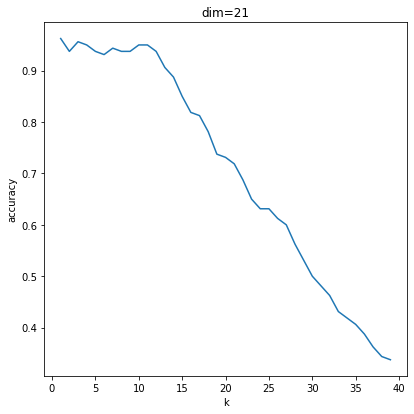

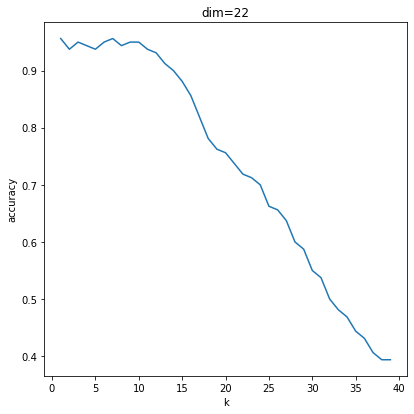

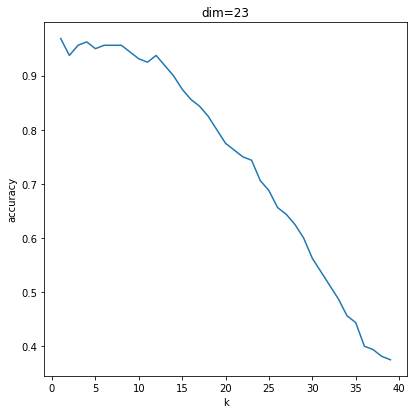

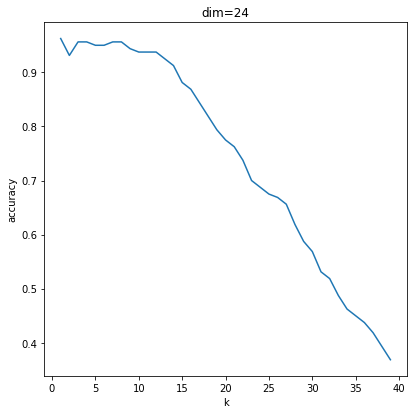

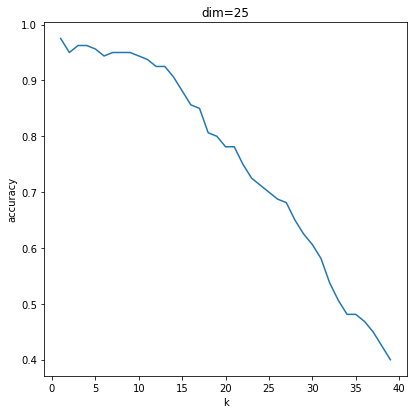

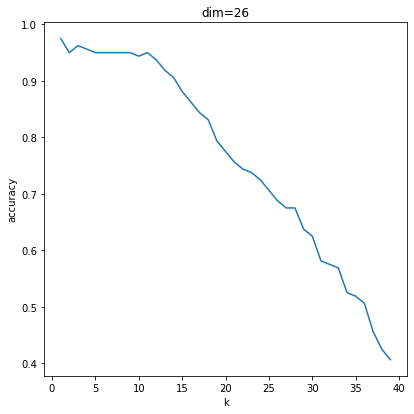

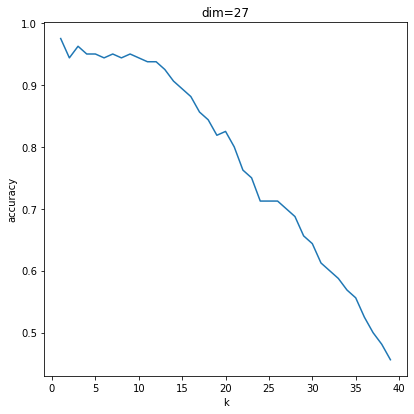

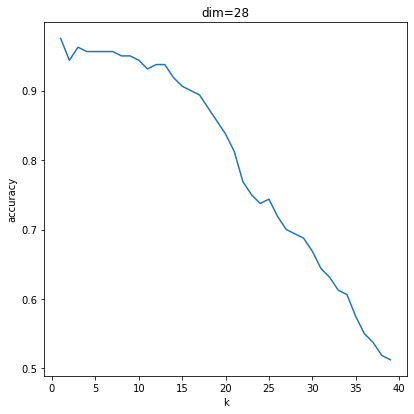

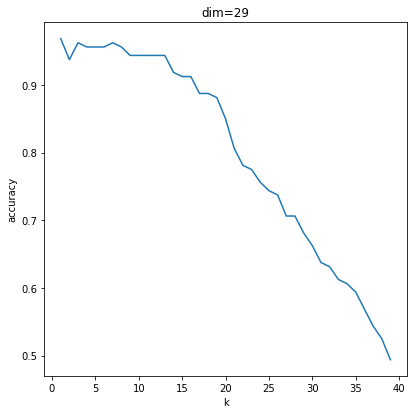

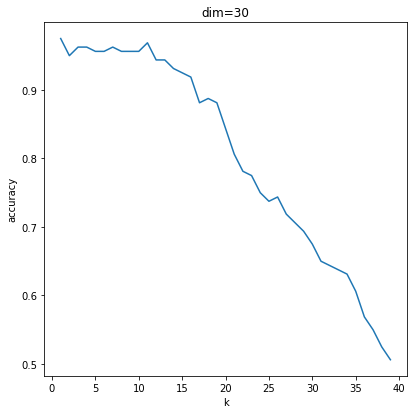

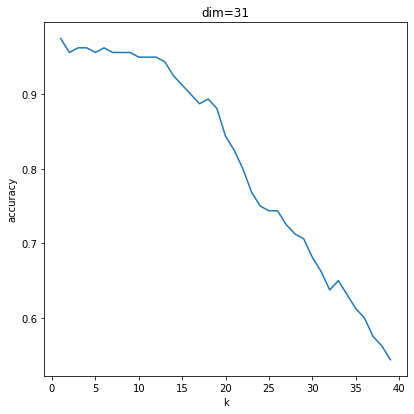

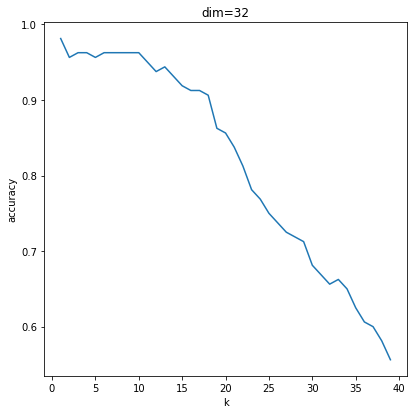

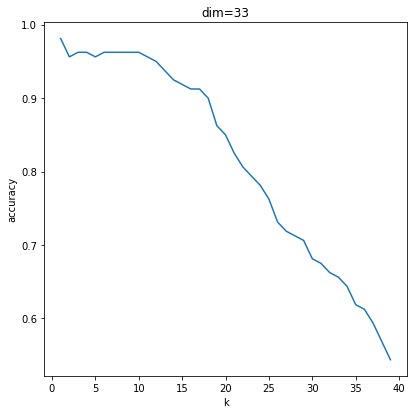

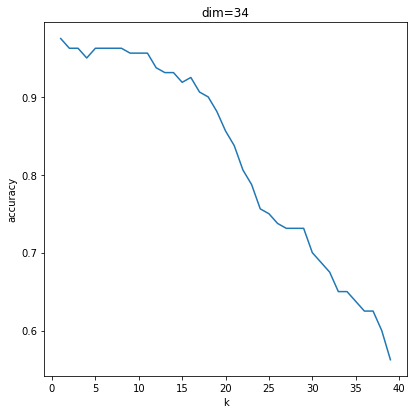

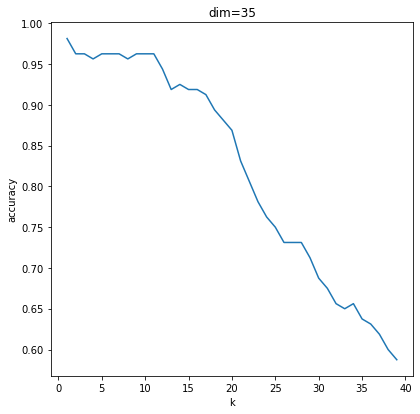

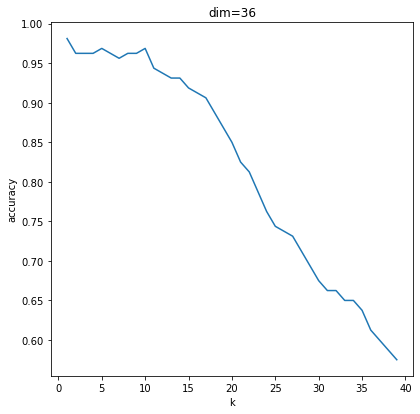

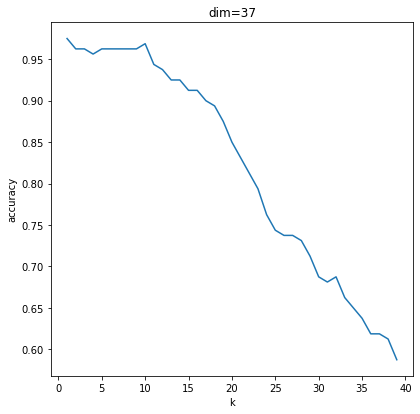

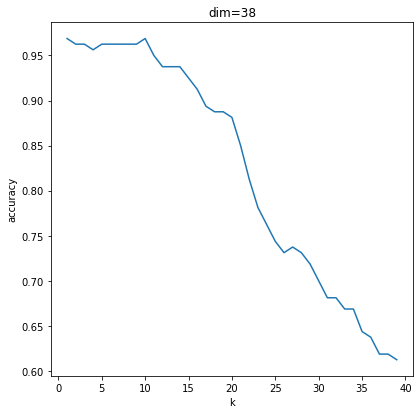

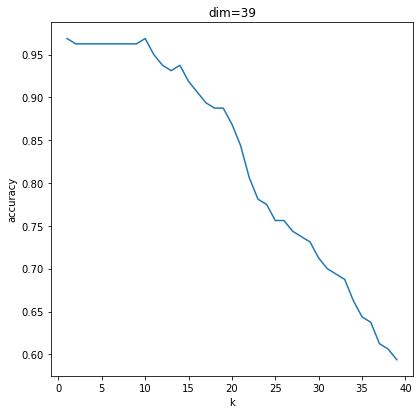

In [74]:
for i in range(1, 40):
    x = df[df['dim'] == i]['k']
    y = df[df['dim'] == i]['acc']
    plt.figure(figsize=(6.5,6.5))
    plt.title(f'dim={i}')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    
    plt.plot(x,y)
    plt.savefig(f'LDA降维+KNN不同dim和k的关系图/dim={i}.png') 